#  Directing Customers to Subscription Through App Behavior Analysis

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser  # to parse data and time feilds
import time
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  # feature scaling
from sklearn.linear_model import LogisticRegression # for building Logistic Regression model
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, precision_score, recall_score

In [2]:
data = pd.read_csv('appdata10.csv')

In [3]:
data.shape

(50000, 12)

In [4]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
data.tail()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [6]:
data.shape

(50000, 12)

In [7]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data['hour']= data.hour.str.slice(1,3).astype(int)

In [9]:
data.hour

0         2
1         1
2        19
3        16
4        18
5         9
6         2
7         3
8        14
9        18
10        4
11       11
12        6
13       19
14        4
15       18
16       16
17       21
18        5
19       17
20        9
21        4
22       17
23        2
24       20
25       18
26       16
27        1
28       11
29       17
         ..
49970    15
49971    11
49972    15
49973    18
49974    20
49975    18
49976    20
49977    15
49978    17
49979    14
49980     7
49981     4
49982     2
49983    13
49984    16
49985    23
49986    18
49987    19
49988     2
49989    17
49990    17
49991    22
49992    15
49993     2
49994    19
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int64

In [10]:
data.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [11]:
data1 = data.copy().drop(columns= ['user','first_open','screen_list','enrolled','enrolled_date'])

In [12]:
data1.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [13]:
data1.shape

(50000, 7)

In [14]:
data1.describe()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.165000
std,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.371184
min,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000
50%,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000
75%,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,0.000000
max,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000


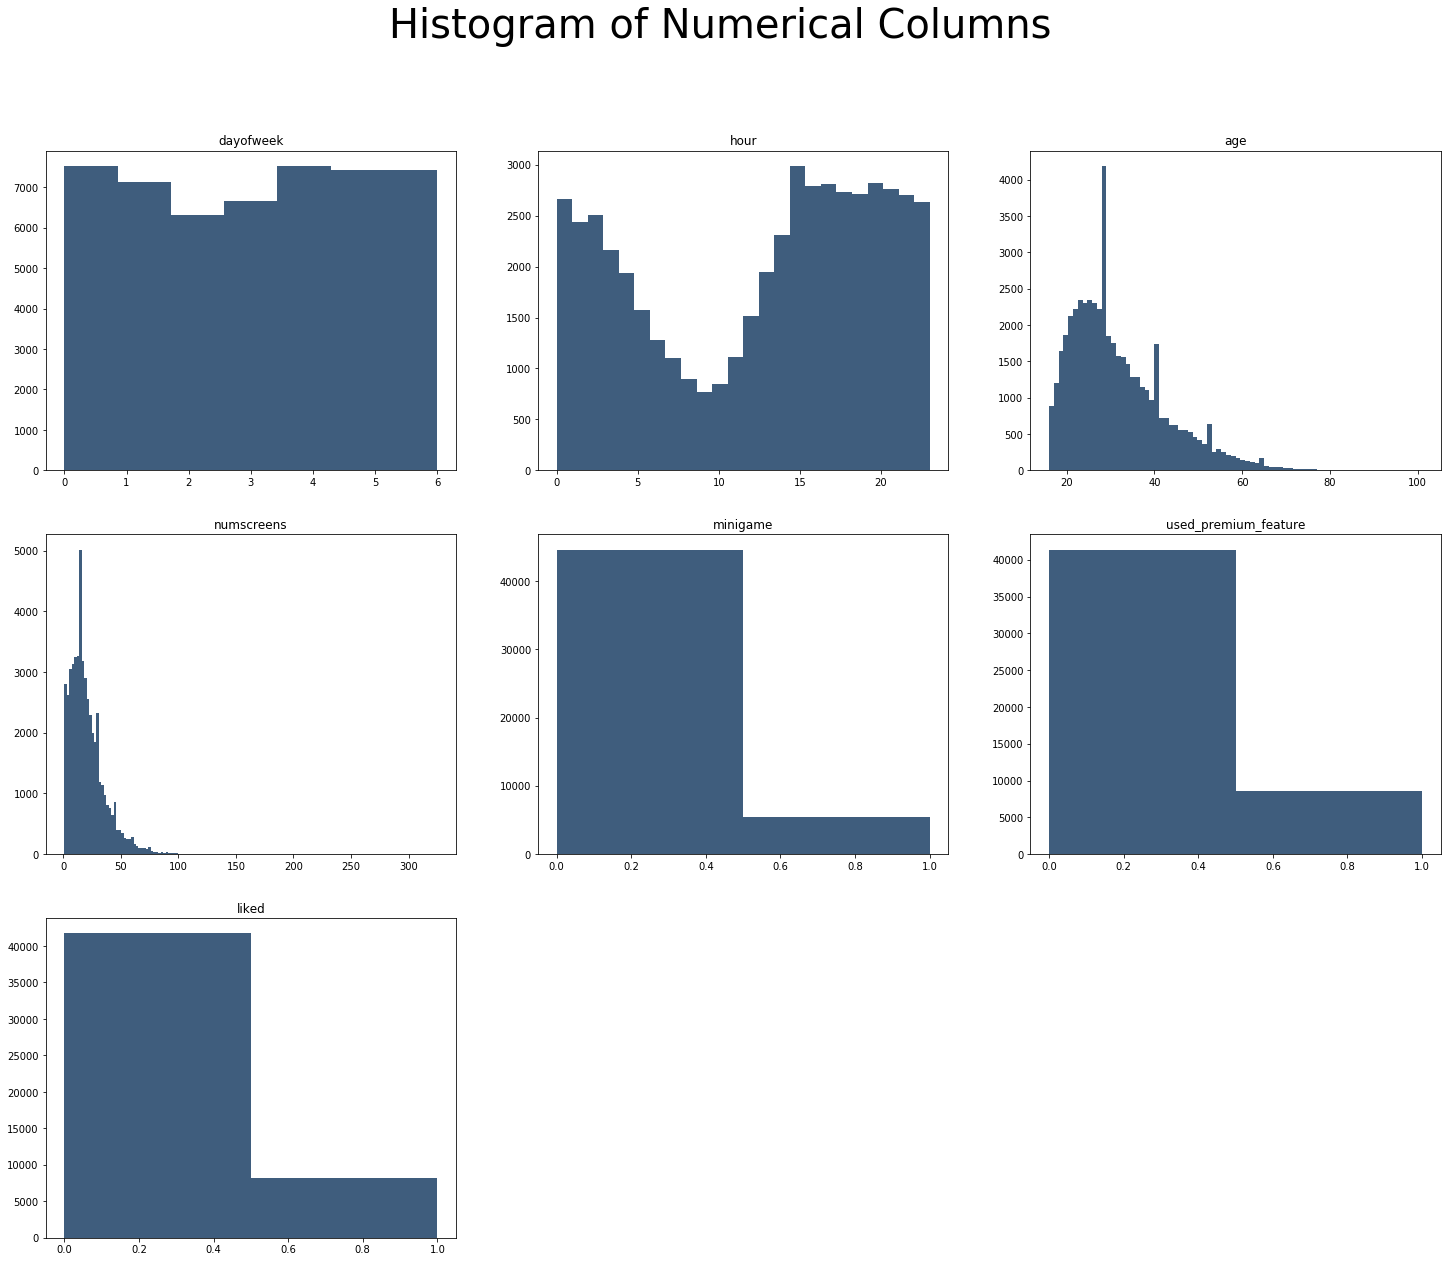

In [15]:
plt.figure(figsize=(25,20)) 
plt.suptitle('Histogram of Numerical Columns', fontsize = 40)
for i in range(1, data1.shape[1]+ 1):
    plt.subplot(3,3,i) # Parameters are nrow, ncol, index
    f = plt.gca() # gets the current axes so that we draw on it directly.
    f.set_title(data1.columns.values[i-1])
    
    vals = np.size(data1.iloc[:,i-1].unique())
    plt.hist(data1.iloc[:,i-1], bins = vals, color = '#3F5D7D')

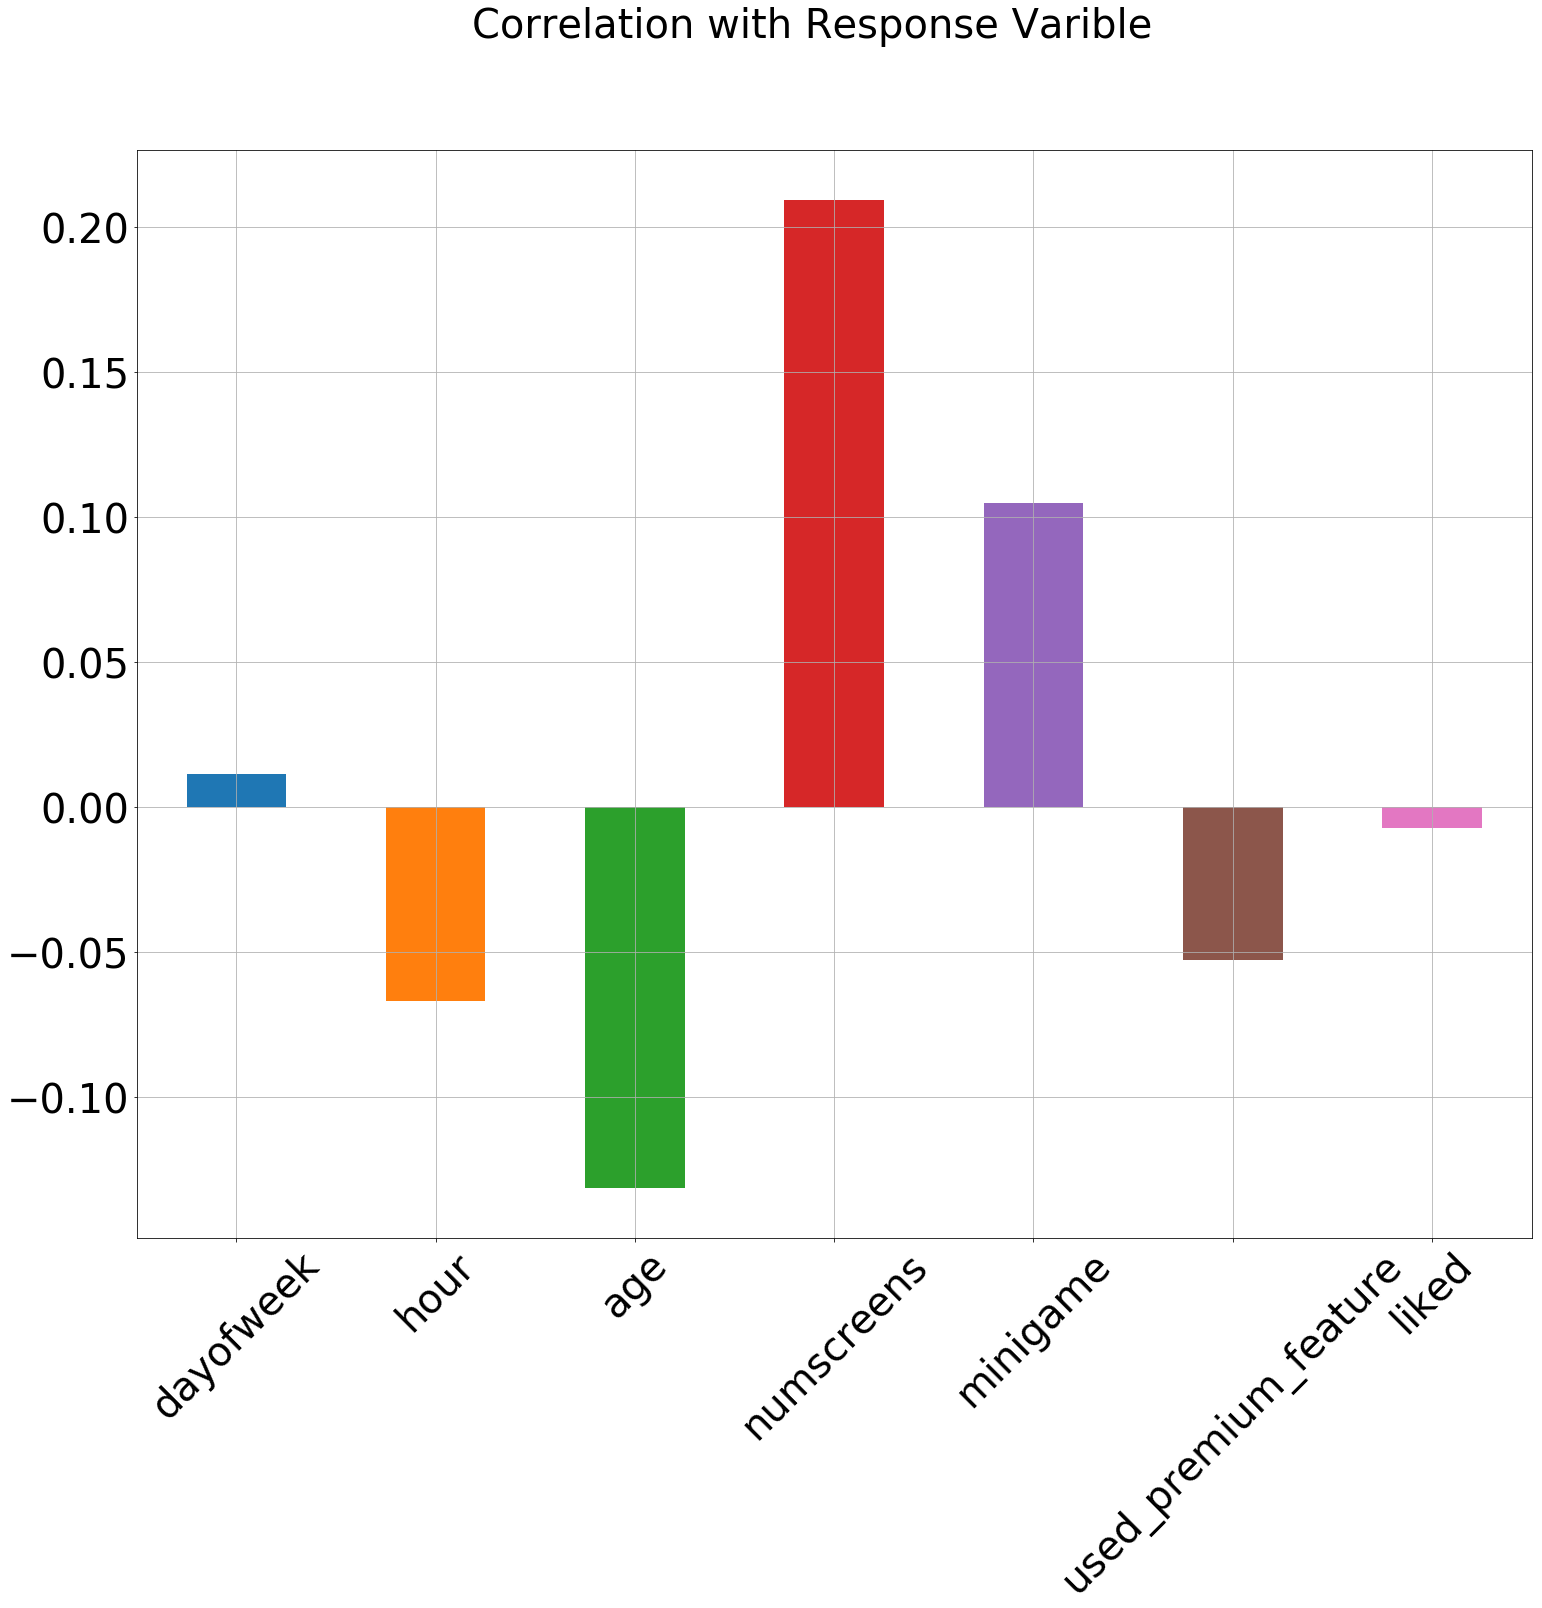

In [16]:
plt.suptitle('Correlation with Response Varible', fontsize = 40)
data1.corrwith(data.enrolled).plot.bar(figsize = (25,20), fontsize = 40, rot = 45, grid = True) 
# rot = 45 mean x-axes label to be 45 degree in angle

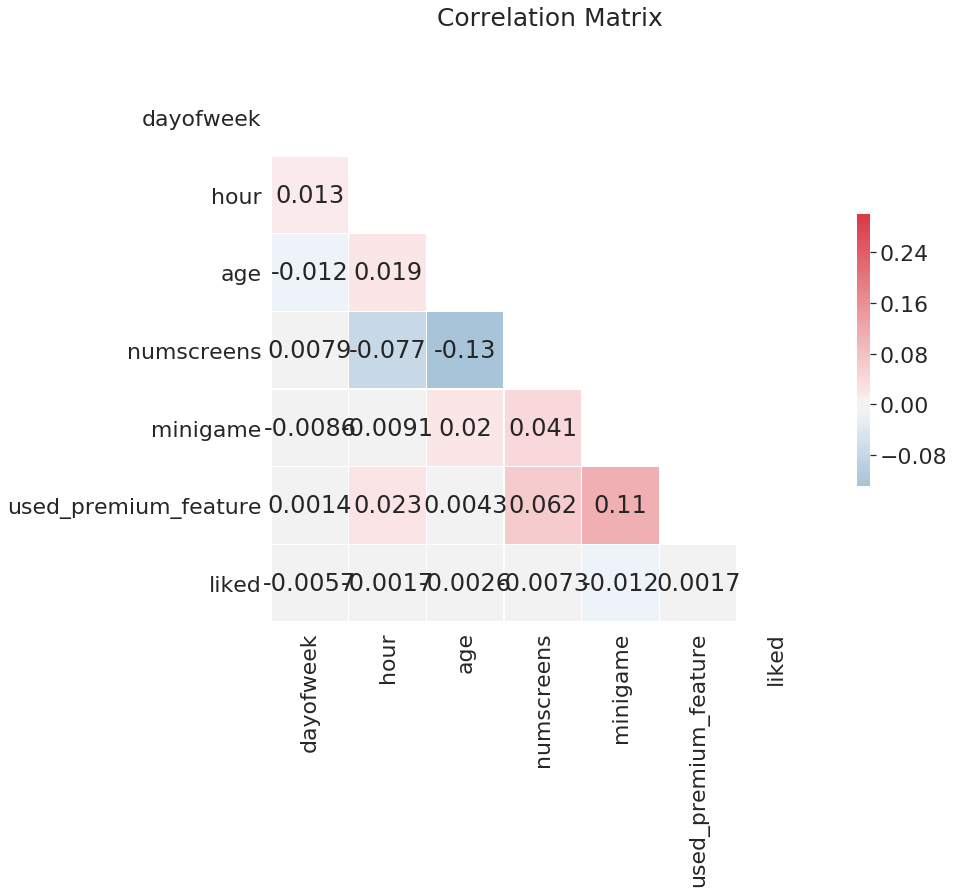

In [17]:
# Correlation Matrix
sns.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = data1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
f.suptitle("Correlation Matrix", fontsize = 25)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240,10 , as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## FEATURE ENGINEERING

In [18]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [19]:
data['first_open'] = [parser.parse(str(row_data)) for row_data in data['first_open']]
data['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in data['enrolled_date']]

In [20]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [21]:
data['difference'] = (data.enrolled_date - data.first_open).astype('timedelta64[h]')

In [22]:
data.head(100)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0
5,56480,2013-04-03 09:58:15.752,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0,0.0
6,144649,2012-12-25 02:33:18.461,1,2,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaT,0,NaN
7,249366,2012-12-11 03:07:49.875,1,3,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaT,0,NaN
8,372004,2013-03-20 14:22:01.569,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0,920.0
9,338013,2013-04-26 18:22:16.013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0,0.0


Text(0.5,1,'Distribution of the Time-Since -Enrolled')

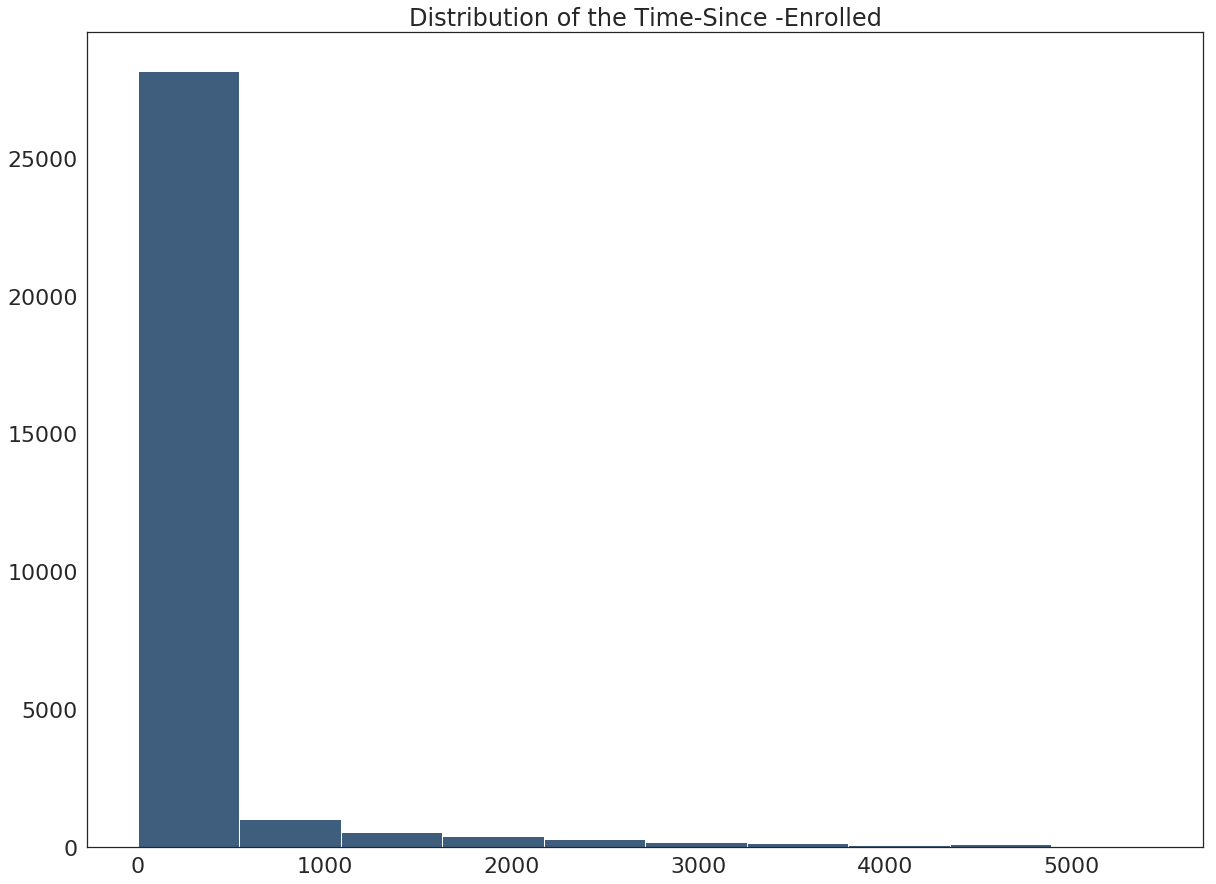

In [23]:
plt.figure(figsize=(20,15))
plt.hist(data['difference'].dropna(), color = '#3F5D7D')
plt.title('Distribution of the Time-Since -Enrolled')

Text(0.5,1,'Distribution of the Time-Since -Enrolled')

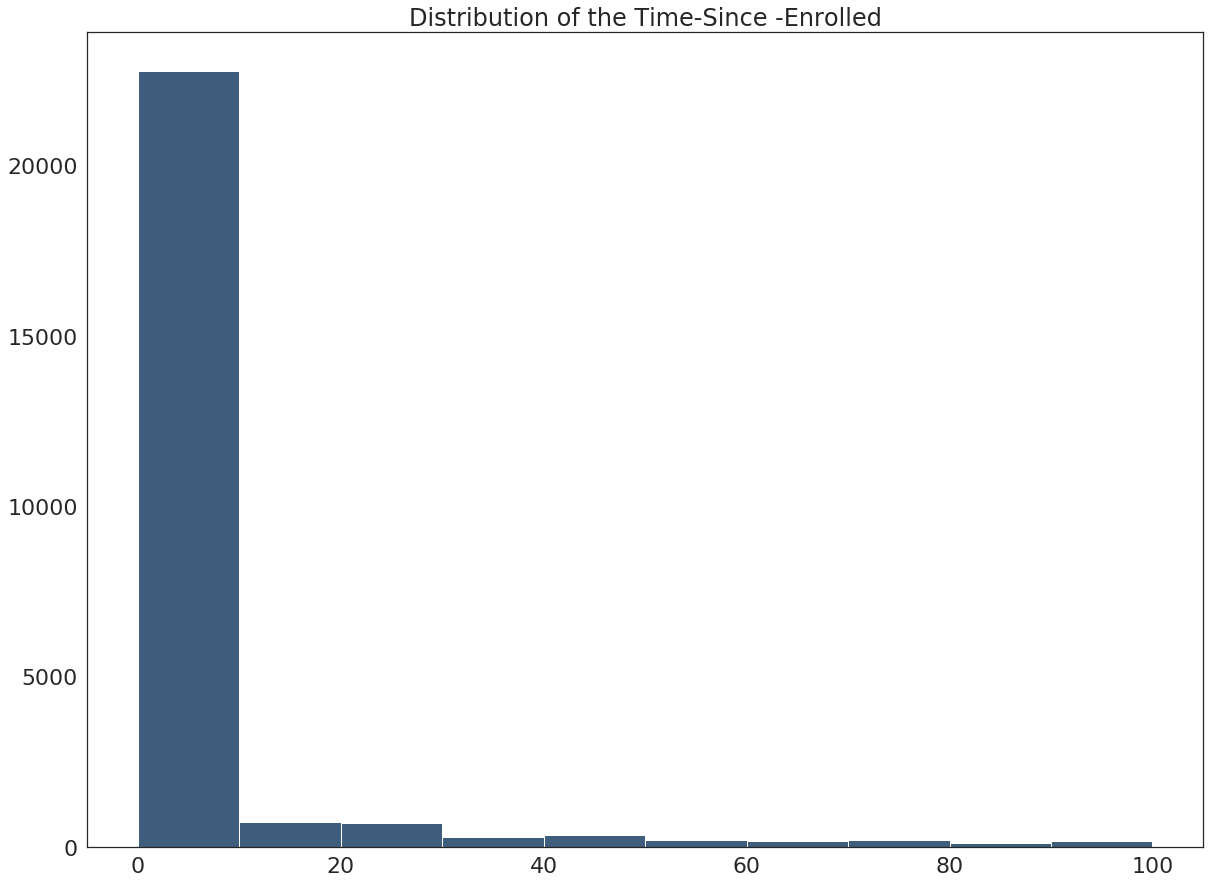

In [24]:
plt.figure(figsize=(20,15))
plt.hist(data['difference'].dropna(), color = '#3F5D7D', range= [0,100])
plt.title('Distribution of the Time-Since -Enrolled')

In [25]:
data.loc[data.difference > 50, 'enrolled'] = 0
data = data.drop(columns=['enrolled_date', 'difference', 'first_open'])

In [26]:
## Formatting the screen_list Field

# Load Top Screens
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

# Mapping Screens to Fields
data["screen_list"] = data.screen_list.astype(str) + ','

for sc in top_screens:
    data[sc] = data.screen_list.str.contains(sc).astype(int)
    data['screen_list'] = data.screen_list.str.replace(sc+",", "")

data['Other'] = data.screen_list.str.count(",")
data = data.drop(columns=['screen_list'])


In [27]:
# Funnels - ara a group of screens that belong to the same set
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
data["SavingCount"] = data[savings_screens].sum(axis=1)
data = data.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
data["CMCount"] = data[cm_screens].sum(axis=1)
data = data.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
data["CCCount"] = data[cc_screens].sum(axis=1)
data = data.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
data["LoansCount"] = data[loan_screens].sum(axis=1)
data = data.drop(columns=loan_screens)

In [28]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [29]:
data.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.498340,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.500002,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [30]:
data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [31]:
data.to_csv('new_appdata10.csv', index = False)

## DATA PREPROCESSING

In [32]:
df = pd.read_csv('new_appdata10.csv')

In [33]:
response = df['enrolled']
df = df.drop(columns='enrolled')

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df, response, test_size = 0.2, random_state = 0)

In [35]:
print(x_train.shape)
print(x_test.shape)

(40000, 49)
(10000, 49)


In [36]:
train_identifier = x_train['user']
x_train = x_train.drop(columns='user')

In [37]:
test_identefier = x_test['user']
x_test = x_test.drop(columns='user')

### FEATURE SCALING


In [38]:
sc_x = StandardScaler()
x_train2 = pd.DataFrame(sc_x.fit_transform(x_train))
x_test2 = pd.DataFrame(sc_x.fit_transform(x_test))

/home/kuldeep/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kuldeep/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/kuldeep/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kuldeep/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
x_train2.columns = x_train.columns.values
x_test2.columns = x_test.columns.values

In [40]:
x_train2.index = x_train.index.values
x_test2.index = x_test.index.values

In [41]:
x_train = x_train2
x_test = x_test2

### MODEL BULDING

In [42]:
classifier = LogisticRegression(random_state= 0, penalty= 'l1')

In [43]:
# TRANING THE MODEL
classifier.fit(x_train, y_train)

/home/kuldeep/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
prediction = classifier.predict(x_test)

In [45]:
accuracy_score(y_test, prediction)

0.7682

In [46]:
precision_score(y_test, prediction)

0.7618857371154615

In [47]:
recall_score(y_test, prediction)

0.7720647773279352

In [48]:
f1_score(y_test, prediction)

0.7669414840136739

In [49]:
cm = confusion_matrix(y_test, prediction)

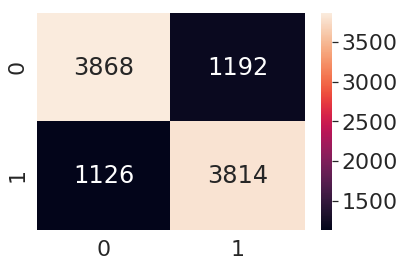

In [50]:
sns.heatmap(cm, annot=True,fmt='g')

In [51]:
# K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score

In [52]:
accuracies = cross_val_score(estimator=classifier, X = x_train, y = y_train, cv=10)

/home/kuldeep/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kuldeep/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kuldeep/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kuldeep/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kuldeep/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

In [53]:
accuracies

array([0.76780805, 0.7668083 , 0.77430642, 0.7675    , 0.76425   ,
       0.7665    , 0.764     , 0.7671918 , 0.77294324, 0.75668917])

In [54]:
accuracies.mean()

0.7667996975359186

In [55]:
# FORMATTING THE FINAL RESULTS 
final = pd.concat([y_test, test_identefier], axis=1).dropna()
final['predicted_results'] = prediction
final[['user','enrolled','predicted_results']].reset_index(drop = True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0
